In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import pandas as pd
import numpy as np
import pickle
import random
random.seed(42)
np.random.seed(42)

In [19]:
with open("../ressources/automode_descriptions_evaluated.pickle", "rb") as file:
#with open("testdata.pkl", "rb") as file:
    original_df = pickle.load(file)

In [20]:
original_df["type"] = original_df["parameters"].map(lambda x: type(x.objective_params).__name__)
original_df["original_index"] = original_df.index
original_df["z-scores"] = original_df["scores"].map(lambda x: (x - np.mean(x)) / np.std(x) if x is not None else None)
original_df["coeff_of_var"] = original_df["scores"].map(lambda x: x+abs(np.min(x)) + 1 if x is not None else None).map(lambda x: np.std(x)/np.mean(x) if x is not None else None)


In [21]:
group_dfs = {category: group.reset_index(drop=True) for category, group in original_df.groupby("type")}

for group, df in group_dfs.items():
    old_size = len(df)
    cleaned = df.dropna()
    new_size = len(cleaned)
    print(f" {group}:  {old_size=} {new_size=}: ratio: {new_size/float(old_size)}")
    group_dfs[group] = cleaned

 Aggregation:  old_size=85 new_size=65: ratio: 0.7647058823529411
 Connection:  old_size=98 new_size=70: ratio: 0.7142857142857143
 Distribution:  old_size=114 new_size=78: ratio: 0.6842105263157895
 Foraging:  old_size=103 new_size=77: ratio: 0.7475728155339806


In [22]:
group_dfs["Aggregation"]

,description,configuration,parameters,argos,behavior_tree,scores,avg_score,type,original_index,z-scores,coeff_of_var
0,"A rectangular area, with a length of 2.43 mete...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[609.375, 545.25, 150.0, 362.625, 601.875, 426...",490.3875,Aggregation,3,"[0.6527075242914112, 0.3009489782660998, -1.86...",0.284225
1,A circle with 4 walls forms the structure of t...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[368.867, 419.333, 277.667, 284.533, 275.933, ...",346.1600,Aggregation,7,"[0.3083811586713668, 0.9937541076963002, -0.93...",0.132000
5,The area is a rectangle with dimensions 3.09 x...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[610.3, 484.9, 630.8, 703.9, 687.9, 436.4, 452...",558.7400,Aggregation,23,"[0.4158963919001486, -0.5956126760649151, 0.58...",0.131294
6,"With a radius of 3.64 meters, the circular are...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[719.909, 704.909, 279.545, 652.364, 647.182, ...",554.6454,Aggregation,27,"[1.0362281976635694, 0.9421758899263936, -1.72...",0.195861
9,"The circular arena, having a radius of 3.50 me...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[445.8, 250.4, 255.68, 207.12, 206.28, 204.68,...",251.0800,Aggregation,44,"[2.755946578124242, -0.00962429988252067, 0.06...",0.156218
...,...,...,...,...,...,...,...,...,...,...,...
80,The environment is a circle made out of 4 wall...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[642.87, 612.783, 546.304, 574.391, 488.043, 6...",580.8001,Aggregation,386,"[1.5390106015125369, 0.7930095290489467, -0.85...",0.037698
81,The environment consists of a rectangular area...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[391.0, 542.778, 312.444, 806.778, 418.333, 41...",551.4888,Aggregation,387,"[-0.7489644600307143, -0.04065130786968006, -1...",0.247743
82,The environment is a rectangular area with len...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[517.75, 493.25, 504.083, 515.833, 497.75, 486...",514.5750,Aggregation,392,"[0.15890510140581607, -1.0672917440879002, -0....",0.019949
83,The environment is a rectangular area with len...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[366.188, 405.875, 507.375, 342.25, 246.125, 4...",365.2064,Aggregation,395,"[0.01388773119541754, 0.5753816064527116, 2.01...",0.115429


## Distribution of Scores

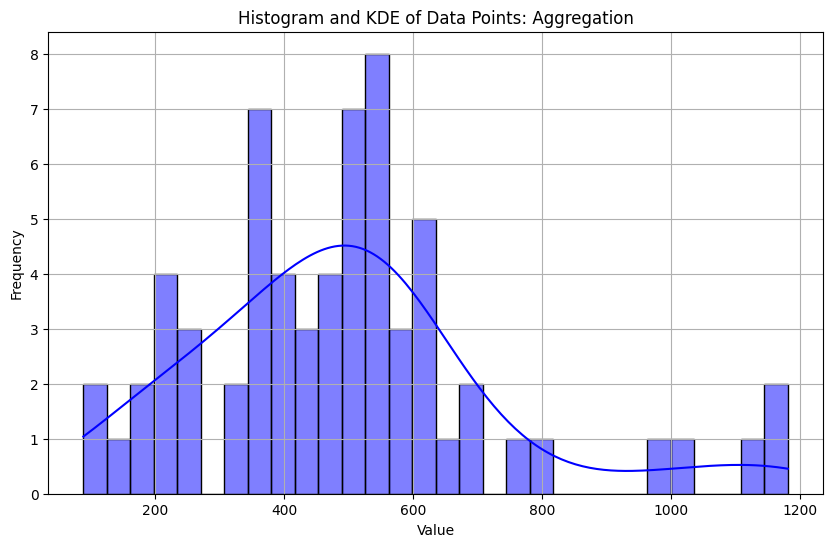

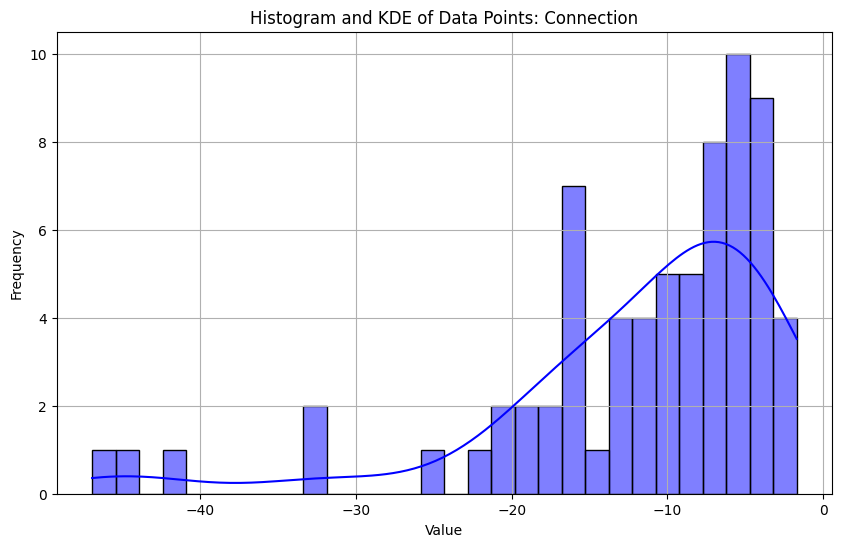

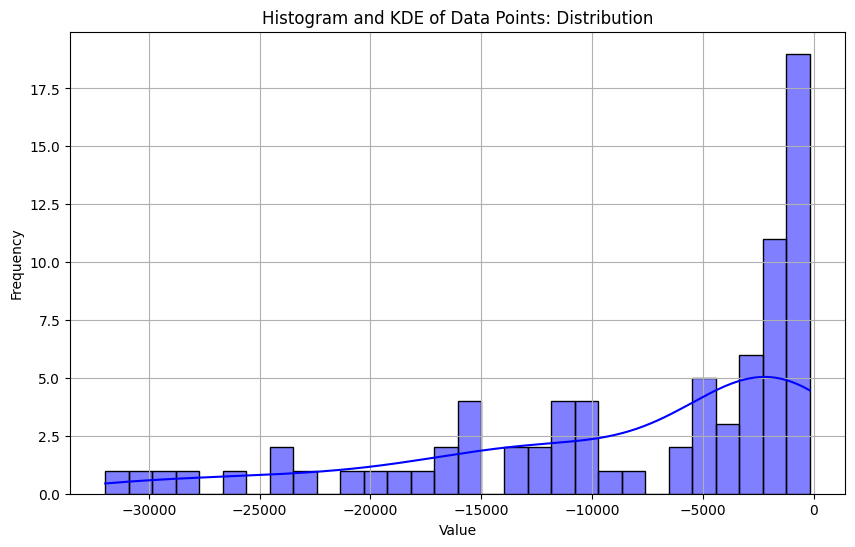

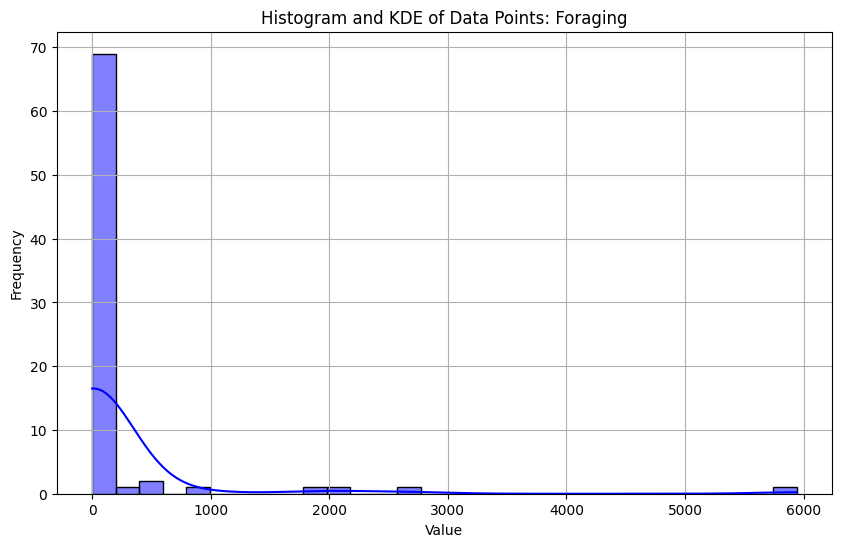

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

for group, df in group_dfs.items():
    # Sample data
    data = df.avg_score.to_numpy()

    plt.figure(figsize=(10, 6))
    sns.histplot(data, bins=30, kde=True, color='blue', alpha=0.5)
    plt.title(f"Histogram and KDE of Data Points: {group}")
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()


In [24]:
import plotly.express as px
import numpy as np

# Sample data
data = group_dfs["Aggregation"].avg_score.to_numpy()

# Create a KDE plot
# fig = px.density_contour(x=data, title='KDE Plot of Data Points', labels={'x': 'Value'})
# fig.update_layout(xaxis_title='Value', yaxis_title='Density')
# fig.show()

# Create a histogram
fig = px.histogram(data, nbins=30, title='Histogram of Data Points', labels={'value': 'Value'})
fig.update_layout(xaxis_title='Value', yaxis_title='Frequency')
fig.show()


## Coefficient of Variation Analysis

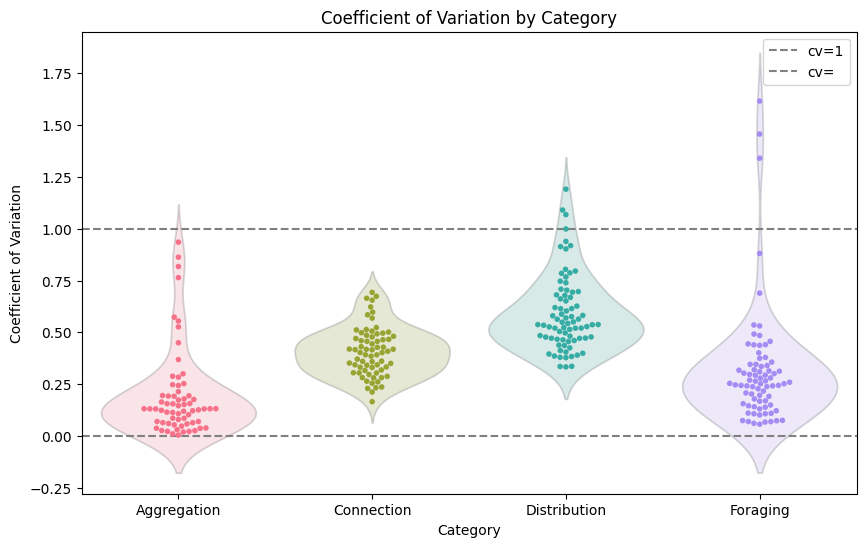

In [57]:
combined_df = pd.concat(
    [df.assign(category=category) for category, df in group_dfs.items()],
    ignore_index=True
)

plt.figure(figsize=(10, 6))

# Define a color palette for the categories
palette = sns.color_palette("husl", n_colors=len(combined_df['category'].unique()))

# Use violinplot to show the distribution of the data with colors
sns.violinplot(data=combined_df, x='category', y='coeff_of_var', inner=None, palette=palette, alpha=0.21, hue='category')

# Overlay swarm plot to scatter individual points with colors
sns.swarmplot(data=combined_df, x='category', y='coeff_of_var', alpha=1.0, size=4, hue='category', palette=palette)

# Add a horizontal line at y=1 (solid and black)
plt.axhline(y=1, color='grey', linestyle='--', label='cv=1')
plt.axhline(y=0, color='grey', linestyle='--', label='cv=')

# Step 4: Customize the plot
plt.title('Coefficient of Variation by Category')
plt.xlabel('Category')
plt.ylabel('Coefficient of Variation')
plt.legend()  # Show legend for the horizontal line
plt.show()